<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl -k https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df.dropna()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df.copy()
df2['sexo'] = df['Gender'].apply(lambda x: 'Masculino'  if x == 'Male' else 'Femenino')
df2['altura'] = df['Height'] * 0.0254
df2['peso'] = df['Weight'] * 0.453592
df2.drop(['Gender', 'Height', 'Weight'], axis=1, inplace=True)
df2.head()

,sexo,altura,peso
0,Masculino,1.875714,109.720985
1,Masculino,1.747060,73.622732
2,Masculino,1.882397,96.497550
3,Masculino,1.821967,99.809504
4,Masculino,1.774998,93.598619


In [7]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

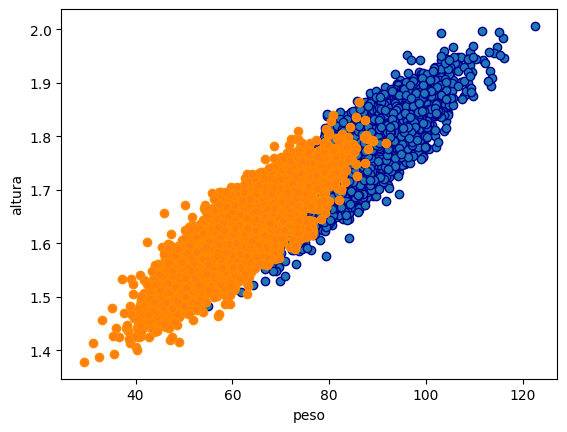

In [8]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
peso_masc = df2[df2['sexo']=='Masculino']['peso']
alt_masc = df2[df2['sexo']=='Masculino']['altura']
peso_fem = df2[df2['sexo']=='Femenino']['peso']
alt_fem = df2[df2['sexo']=='Femenino']['altura']

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(peso_masc,alt_masc, edgecolors='darkblue', label='masculino')
ax.scatter(peso_fem,alt_fem, edgecolors='darkorange', label='femenino')
ax.set_xlabel('peso')
ax.set_ylabel('altura')
plt.show()

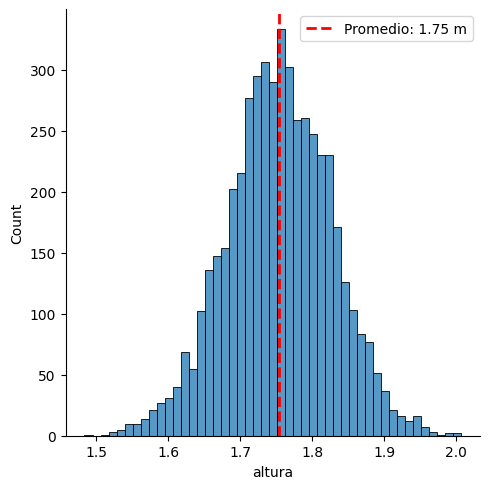

1.7532691860179221


In [9]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
promedio_altura = alt_masc.mean()
sns.displot(alt_masc)
plt.axvline(promedio_altura, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_altura:.2f} m')
plt.legend()
plt.show()
print(promedio_altura)

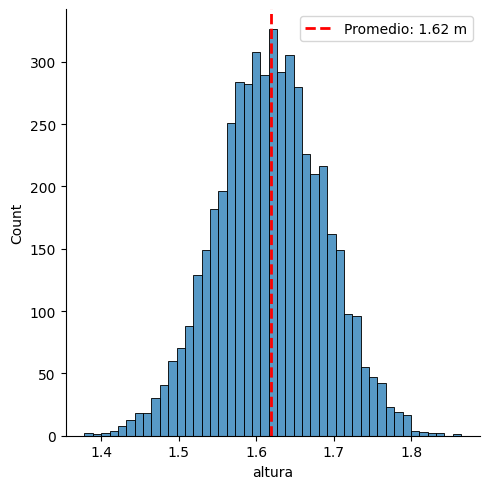

1.6182028495269967


In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

promedio_altura = alt_fem.mean()
sns.displot(alt_fem)
plt.axvline(promedio_altura, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_altura:.2f} m')
plt.legend()
plt.show()
print(promedio_altura)

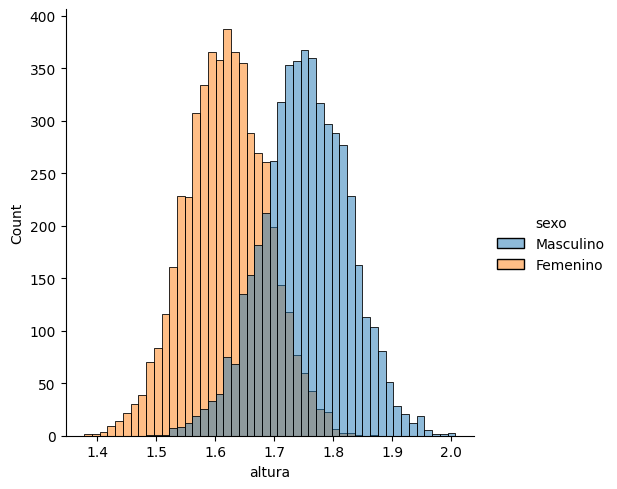

In [11]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [34]:
# definimos variables

x = df2[df2['sexo'] == 'Masculino'][['peso']].values
y = df2[df2['sexo']=='Masculino']['altura'].values

In [35]:
from sklearn.model_selection import train_test_split

# Separamos los datos 70/30

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

# Creamos el modelo de  regresion 

lr = LinearRegression()
lr.fit(x_train,y_train)
y_hat= lr.predict(x_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [37]:
from sklearn.metrics import r2_score
value = r2_score(y_test, y_hat)
print(f"Cofeciente de determinacion:{value:.2f}")

Cofeciente de determinacion:0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [38]:
peso = np.array([80])
y_hat_prueba = lr.predict(peso.reshape(-1,1))
y_hat_prueba

array([1.71948325])